# Package

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

In [2]:
file = h5py.File("RW_RH83_Linear_2_s1.h5")

In [3]:
beta = 1*2e-11
omega = 2*np.pi/100/86400

In [10]:
psi = file["tasks"]["psi"][:]
x = file["scales"]["x"]["1.0"][:]
y = file["scales"]["y"]["1.0"][:]
t = file["scales"]["sim_time"][:]

In [11]:
Nx = np.size(x)
Ny = np.size(y)
Nt = np.size(t)

Px = np.abs(x[-1] - x[0])
Py = np.abs(y[-1] - y[0])
Pt = np.abs(t[-1] - t[0])

k = np.fft.fftfreq(Nx, d=Px/(2*np.pi)/Nx)
l = np.fft.fftfreq(Ny, d=Py/(2*np.pi)/Ny)
w = np.fft.fftfreq(Nt, d=Pt/(2*np.pi)/Nt)

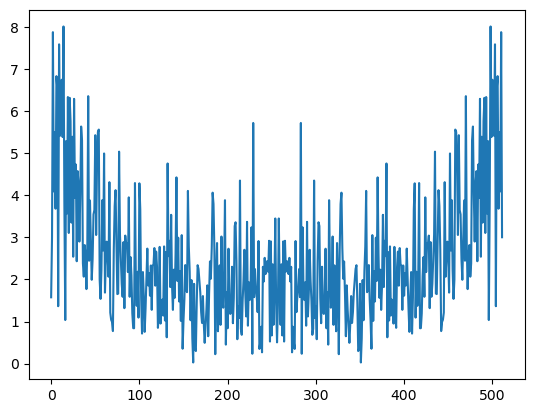

In [12]:
signal_1 = np.exp(-(x/100/1e3)**2)
signal_2 = np.exp(-(x/100/1e3)**2)+np.random.normal(0,0.1,512)
plt.plot(np.abs(np.fft.fft(signal_2)))

# psi(x,y,t) -> psi(k,l,t)

In [13]:
psi_sp = np.fft.fftn(psi, axes = (1,2))

Text(0.5, 1.0, 'Power spectrum at t=199')

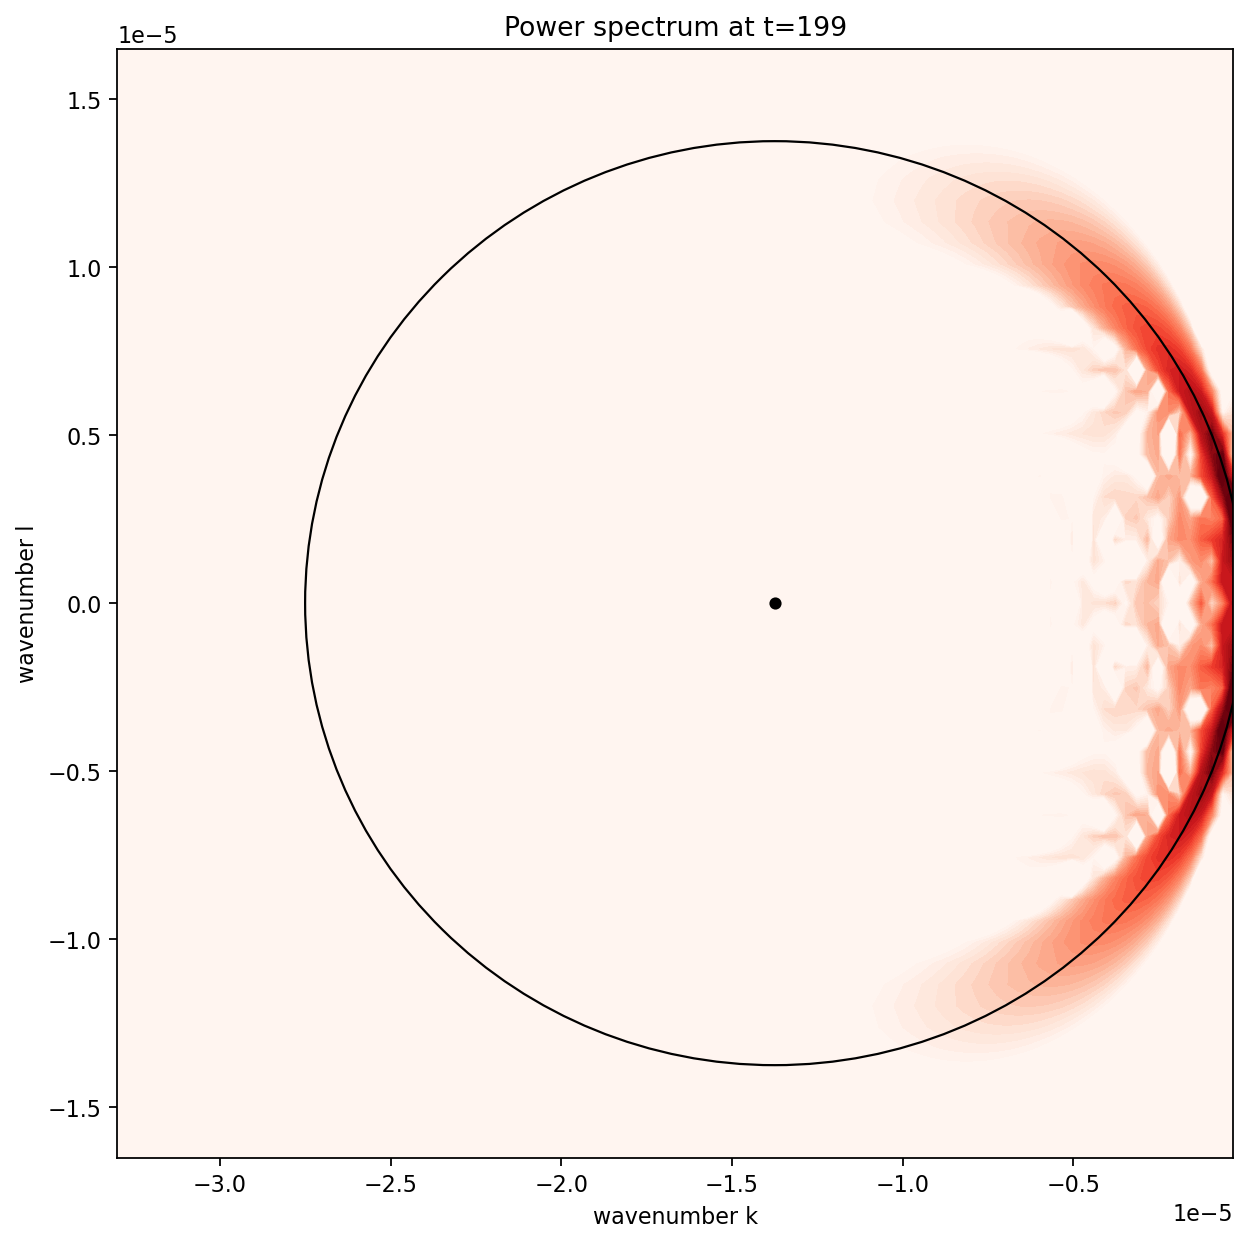

In [20]:
tindex = 199

coord_x = k[int(Nx/2):]
coord_y = np.fft.fftshift(l[:])
coord_z = psi_sp[tindex,int(Nx/2):,:]
coord_z = np.fft.fftshift(coord_z, axes = 1)
coord_z = np.log(np.abs(coord_z))
coord_z = coord_z.T

coutourf_levels = np.linspace(15,18,32)

fig, ax = plt.subplots(figsize = (9,9), dpi = 160)

ax.contourf(coord_x,
            coord_y,
            coord_z, 
            levels = coutourf_levels,
            extend = "both",
            cmap = "Reds")

ax.scatter([-beta/(2*omega)],[0], c = "k", s = 20)
circle1 = plt.Circle((-beta/2/omega, 0), beta/2/omega, fill = False)
ax.add_patch(circle1)


plt.xticks(np.linspace(-4e-5,0,9))
plt.yticks(np.linspace(-2e-5,2e-5,9))
plt.xlabel("wavenumber k")
plt.ylabel("wavenumber l")
plt.xlim(1.2*-beta/omega, k[-1])
plt.ylim(1.2*-beta/2/omega, 1.2*beta/2/omega)
plt.title(f"Power spectrum at t={tindex}")

# psi(x,y,t) -> psi(k,l,w)

In [184]:
psi_sp = np.fft.fftn(psi, axes = (0,1,2))

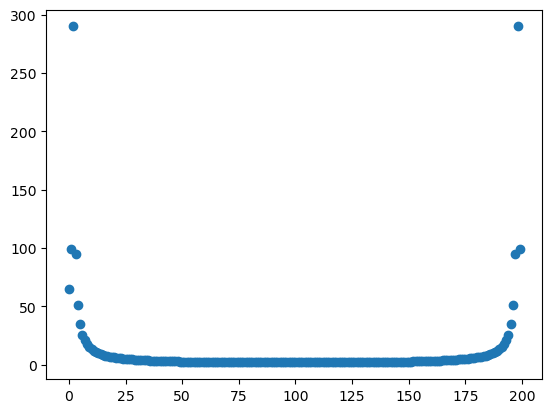

In [185]:
plt.scatter(np.arange(200),np.sum(np.abs(psi_sp), axis = (1,2)))
#plt.xlim(-1,10)

(-2.1885375666744957e-06, 2.1885375666744957e-06)

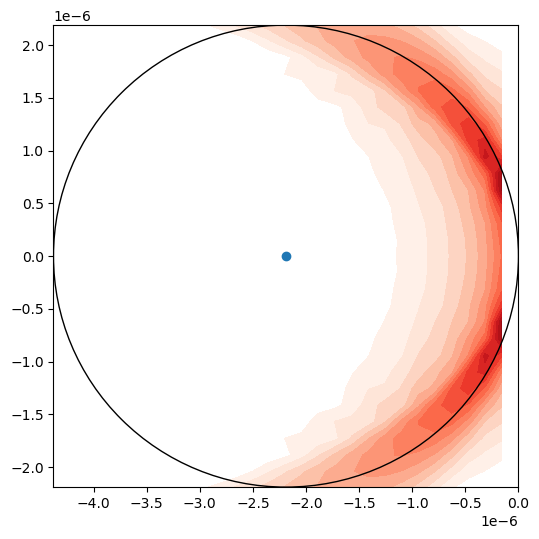

In [31]:

fig, ax = plt.subplots(figsize = (6,6), dpi = 100)
ax.contourf(k[int(Nx/2):],
            np.fft.fftshift(l[:]),
            np.log(np.abs(np.fft.fftshift(psi_sp[198,int(Nx/2):,:], axes = 1)).T), 
            levels = np.linspace(20,24,16), 
            cmap = "Reds")
ax.scatter([-beta/2/omega/2/np.pi],[0])

circle1 = plt.Circle((-beta/2/omega/2/np.pi, 0), beta/2/omega/2/np.pi, fill = False)
ax.add_patch(circle1)

plt.xlim(-beta/omega/2/np.pi, 0)
plt.ylim(-beta/2/omega/2/np.pi, beta/2/omega/2/np.pi)